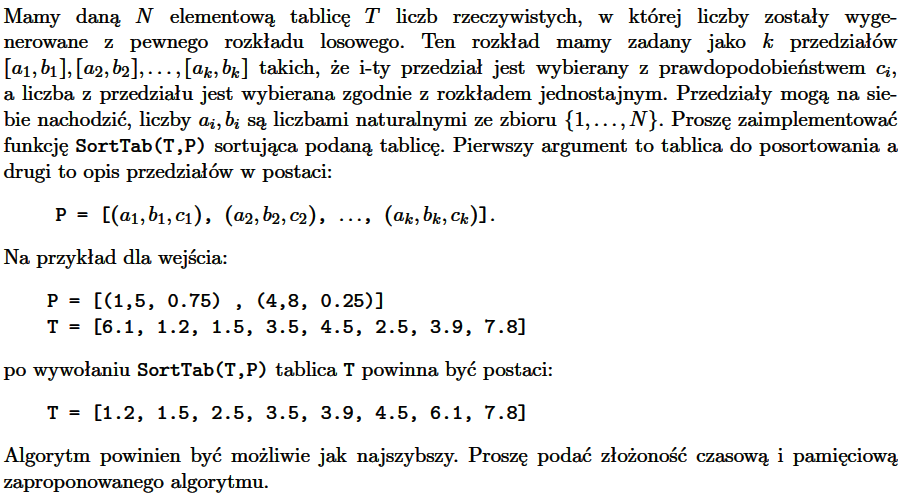

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
from random import randint

T1 = [6.1, 1.2, 1.5, 3.5, 4.5, 2.5, 3.9, 7.8]
P1 = [(1, 5, 0.75), (4, 8, 0.25)]

T2 = [2.4, 7.9, 7.0, 2.8, 6.7, 3.8, 7.2, 6.8, 2.8, 7.5, 2.2, 6.9, 8.7, 2.8, 2.7, 7.7, 3.8, 3.5, 8.6, 2.5]
P2 = [(2, 4, 0.5), (6, 9, 0.5)]

T3 = [5.2, 2.7, 6.6, 3.9, 1.4, 4.8, 6.3, 7.0, 6.4, 1.1, 7.4, 5.4, 5.1, 4.3, 6.7, 7.2, 5.6, 7.7, 6.9, 1.6, 2.7, 4.1, 4.3, 6.5]
P3 = [(1, 4, 0.25), (4, 7, 0.5), (6, 8, 0.25)]

TESTS = [(T1, P1), (T2, P2), (T3, P3)]


def isok(t1, t2):
    N = len(t2)
    if len(t1) != len(t2): return False
    if sorted(t1) != t2: return False
    for i in range(1, N):
        if t2[i - 1] > t2[i]: return False
    return True


def runtests(f):
    OK = True
    for T, P in TESTS:

        print("----------------------")
        print("inp = ", T)

        T2 = T.copy()
        f(T2, P)

        print("out = ", T2)

        if not isok(T, T2):
            print("Blad!")
            OK = False
        else:
            print('OK')
    print("----------------------")

    if OK:
        print("OK!")
    else:
        print("Bledy!")

### Implementacja

In [2]:
def minmax(A):
    if not A: return (None,) * 2
    min_ = max_ = A[-1]
    
    for i in range(1, len(A), 2):
        if A[i] > A[i - 1]:
            if A[i] > max_: max_ = A[i]
            if A[i - 1] < min_: min_ = A[i - 1]
        else:
            if A[i] < min_: min_ = A[i]
            if A[i - 1] > max_: max_ = A[i - 1]
                
    return min_, max_


def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i-1
        temp = arr[i]
        
        while j >= 0 and temp < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        
        arr[j+1] = temp


def SortTab(T, P):
    n = len(T)
    A = []
    for a, b, _ in P:
        A.append(a)
        A.append(b)
    min_, max_ = minmax(A)
    m = max_ - min_
    
    buckets = [[] for _ in range(m)]
    
    for num in T:
        idx = int((num - min_) / m)
        buckets[idx].append(num)
    
    for bucket in buckets:
        insertion_sort(bucket)
        
    idx = 0
    for bucket in buckets:
        for num in bucket:
            T[idx] = num
            idx += 1

###### Kilka testów

In [3]:
runtests(SortTab)

----------------------
inp =  [6.1, 1.2, 1.5, 3.5, 4.5, 2.5, 3.9, 7.8]
out =  [1.2, 1.5, 2.5, 3.5, 3.9, 4.5, 6.1, 7.8]
OK
----------------------
inp =  [2.4, 7.9, 7.0, 2.8, 6.7, 3.8, 7.2, 6.8, 2.8, 7.5, 2.2, 6.9, 8.7, 2.8, 2.7, 7.7, 3.8, 3.5, 8.6, 2.5]
out =  [2.2, 2.4, 2.5, 2.7, 2.8, 2.8, 2.8, 3.5, 3.8, 3.8, 6.7, 6.8, 6.9, 7.0, 7.2, 7.5, 7.7, 7.9, 8.6, 8.7]
OK
----------------------
inp =  [5.2, 2.7, 6.6, 3.9, 1.4, 4.8, 6.3, 7.0, 6.4, 1.1, 7.4, 5.4, 5.1, 4.3, 6.7, 7.2, 5.6, 7.7, 6.9, 1.6, 2.7, 4.1, 4.3, 6.5]
out =  [1.1, 1.4, 1.6, 2.7, 2.7, 3.9, 4.1, 4.3, 4.3, 4.8, 5.1, 5.2, 5.4, 5.6, 6.3, 6.4, 6.5, 6.6, 6.7, 6.9, 7.0, 7.2, 7.4, 7.7]
OK
----------------------
OK!
